### 支持向量机 SVM

- 利用SVM算法来对iris数据集进行分类处理：
- 实现了打星号（**）的算法 1和4和6
 
> 1.利用算法1和梯度下降法求解7.63**** 
- primal model: 算法1
- primal model with hinge loss: (7.63)
- 解释：hingeloss没有约束条件可以直接梯度下降求得w和b

> 2.利用算法1和梯度下降法求解7.32-7.34
- primal model: 算法1
- primal model: (7.32-7.34)
- 解释：primalmodel具有约束条件，要使用带约束问题的梯度下降法求得w和b

> 3.利用算法2/3和梯度下降法求解7.37-7.39
- dual model: 算法2、3
- dual model: (7.37-7.39)
- 解释：dualmodel具有约束条件，要使用带约束问题的梯度下降法求得alpha1234…，进而求得w和b，alpha的梯度看上去更容易求得

> 4.利用算法2/3和梯度下降法求解7.95-7.97 – 1 bonus****
- dual model: 算法2、3
- 非线性SVM模型（7.95-7.97）
- dual model with non-liniear kernel: (7.88), (7.90)
- 解释：与3没有什么不同，多了一个非线性的核函数

> 5.利用SMO算法求解7.37-7.39 – 2 bonus
- SMO:算法
- dual model: (7.37-7.39)
- 解释：dualmodel具有约束条件，使用smo算法，用启发式的方法求得两个alpha的最值。

> 6.利用SMO算法求解7.95-7.97 – 3 bonus****
- SMO:算法
- 非线性SVM模型（7.95-7.97）
- dual model with non-linear kernel: (7.88), (7.90)
- 解释：与5没什么不同，多了核函数。 

> 利用梯度下降法求解有约束问题一般来说也有几种方式，例如：
- 惩罚函数法：将约束问题转换为无约束问题，然后再利用梯度下降法求解
- 梯度投影法：将梯度下降后的结果再投影到可行域中

In [1]:
from sklearn import datasets
from scipy.optimize import minimize
import numpy as np
from numpy import *
import math
import matplotlib.pyplot as plt

In [2]:
def load_iris(ratio=0.8):
    features, target = datasets.load_iris(True)
    
    # 只保留0,1分类 -- 把任务变成二分类任务
    idx = np.bitwise_or(target == 0, target == 1)
    features = features[idx]
    target = target[idx]
    
    num_samples = len(target)
    num_train = math.ceil(num_samples * ratio)
    
    
    # 随机打乱数据
#     np.random.seed(4)
    idx = np.random.permutation(np.arange(num_samples))
    traindata = features[idx[:num_train]], target[idx[:num_train]]
    validdata = features[idx[num_train:]], target[idx[num_train:]]
    
    return traindata, validdata

数据预处理：
svm 是+1 和-1 分类的，做一些修改

In [3]:
def process_X():
    (X_train, Y_train), (X_valid, Y_valid) = load_iris()
    for i,value in enumerate(Y_train):
        Y_train[i] = -1 if Y_train[i]==0 else 1 
    for i,value in enumerate(Y_valid):
        Y_valid[i] = -1 if Y_valid[i]==0 else 1 
    Y_train=Y_train.reshape(-1,1)
    Y_valid=Y_valid.reshape(-1,1)
    return (X_train, Y_train), (X_valid, Y_valid)

#### 代码逻辑
##### SVM类：相当于main函数
```python
def fit(self,***,math_program,algo,***)
    if math_program == "hinge_loss": # 如果用的是hinge_loss的话
        do sth with Math_program类
        if algo == "hinge_loss_algo": # 如果算法是hinge_loss 的梯度下降法（事实上是adagrad）的话
            do sth with Algorithm类
    elif math_program ==……:  # 如果用的是其他数学规划类的话
        do sth
        if algo==……:
            do sth
    else:
        raise NameError("your algo is,{}".format(math_program))
    

def predict(self,****,isnoliner)：
    if not isnoliner: # 如果是线性的话
        predict sth
    else: # 如果不是线性的话
        predict sth

def predict_smo():
    #前面那个函数写烂了，重写了一个去predictSMO。
```

##### Math_programming（是SVM的子类）：处理有关数学规划方程（loss表示式）的问题
```python
def __inti__:
    xxxx
    
def hinge_loss(self, X, Y, w, b):
    """return 正则化的合页损失函数，一个掩码矩阵(就是矩阵中的哪些行是要求梯度的，即合页损失中大于0的)"""
    return loss,score_matrix

def dual_model_nonliner_loss(self, X, Y, alpha):
    """return Q矩阵：Q_ij=y_i*_y_j*(x_i)*(x_j)"""
    return Q_matrix

```

##### Algorithm（是Math_programming的子类）：处理有关优化update参数的问题
```python
def __init__(self, X, Y, math_program, lamda=1,margin_C=1):
    super(Algorithm, self).__init__(X, Y, math_program, lamda=lamda,margin_C=margin_C) ## 继承父类

def hinge_loss_algo(self, score_matrix, w, b, X, Y, iternum, math_program_name,verbose=True):
    """
    梯度下降:这里用的是adagrad
    """
    
def dual_optm_algo(self, Q_matrix,X, Y,math_program_name,alpha,C,verbose=True):
    """
    利用scipy库的优化算法，直接求解带约束的问题中的alpha，再计算b，最后利用非线性
    的决策函数求得y^hat。

    """  
def smo():
    """ 
    好长，把一些函数直接塞进了函数，非常乱
    """
```

In [4]:
class SVM:
    def __init__(self):
        pass

    def fit(self,X_train,Y_train,math_program,algo,iternum=1000,lamda=1,margin_C=1,toler=1):
        if math_program == "hinge_loss":
            method1 = Math_programming(X_train,
                                       Y_train,
                                       math_program,
                                       lamda=lamda)
            '''因为是在Math_programming里面初始化的，所以要copy一下放到SVM类里面'''
            self.n = method1.n
            self.dim = method1.dim
            self.w = method1.w
            self.b = method1.b
            self.lamda = method1.lamda
            self.loss = method1.loss

            self.loss, score_matrix = method1.hinge_loss(
                X_train, Y_train, self.w, self.b)

            if algo == "hinge_loss_algo":
                algo1 = Algorithm(X_train, Y_train, math_program, lamda=lamda)

                self.w, self.b, self.lossbox = algo1.hinge_loss_algo(
                                                    score_matrix,
                                                    self.w,
                                                    self.b,
                                                    X_train,
                                                    Y_train,
                                                    iternum=iternum,
                                                    math_program_name=method1)

            else:
                raise NameError("your algo is,{}".format(algo))
                
        elif math_program == "dual_model_nonliner_loss":
            method2 = Math_programming(X_train,
                                   Y_train,
                                   math_program,
                                   margin_C=margin_C)
            
            self.n = method2.n
            self.dim = method2.dim
            self.alpha = method2.alpha
            self.w = method2.w
            self.b = method2.b
            self.loss = method2.loss
            self.C = method2.C
            self.X_train = X_train
            self.Y_train = Y_train
                      
            self.Q_matrix = method2.dual_model_nonliner_loss(X_train, Y_train, self.alpha)

            if algo == "dual_optm_algo":

                algo2 = Algorithm(X_train,
                                  Y_train,
                                  math_program,
                                  margin_C=self.C)      
                self.alpha, self.b = algo2.dual_optm_algo(self.Q_matrix,
                                                      X_train,
                                                      Y_train,
                                                      method2,
                                                      self.alpha,
                                                      self.C,
                                                      verbose=True)
        elif math_program == "dual_model_smo":
            method3 = Math_programming(X_train, Y_train,math_program,margin_C, toler, iternum, kernel_param=1)
            
            self.X = method3.X
            self.y = method3.y
            self.C = method3.C
            self.toler = method3.toler
            self.kernel_param = method3.kernel_param
            self.m = method3.m
            self.mapped_data = method3.mapped_data
            self.E = method3.E
            self.alphas = method3.alphas
            self.b = method3.b
            
            if algo=="smo_algo":
                algo3 = Algorithm(X_train,Y_train,math_program)   
                self.alpha, self.b = algo3.smo(X_train, Y_train,method3 ,margin_C, toler,iternum, self.kernel_param)

            else:
                raise NameError("your algo is,{}".format(algo))
         
        else:
            raise NameError("your math_program is,{}".format(math_program))
            
    def predict(self, X_test, isnolinear=False):
        numtest = X_test.shape[0]
        Y_pred = []
        if not isnolinear:
            Y_pred = np.sign(X_test.dot(self.w) + self.b)
        else:
            ### 利用alpha 写出非线性的决策函数
            def gaussiantemp(x1, x2):
                gamma = 1.0
                return np.exp(-gamma * np.linalg.norm(x1 - x2))

            for i in range(numtest):
                kernel_maxtrix = np.zeros((self.n, 1))
                for j in range(self.n):
                    kernel_maxtrix[j, :] = gaussiantemp(
                        X_test[i, :], self.X_train[j, :])
                temp = np.multiply(self.alpha.reshape(self.n, 1), self.Y_train)
                temp = np.multiply(temp, kernel_maxtrix)
                temp = np.sum(temp)
                Y_pred_pred = np.sign(temp + self.b)
                Y_pred.append(Y_pred_pred)
                
            Y_pred = np.array(Y_pred).reshape(-1, 1)
        return Y_pred
    
    def predict_smo(self,X_test, *args):
        """预测smo的算法"""
        
        def gaussker(X,Y,var = 1):
            """高斯核"""
            a = X.reshape(-1,1,4)
            b = Y.reshape(1,-1,4)#reshape一下方便广播
            c = a-b   #广播机制
            d = np.linalg.norm(c,axis=2)  #对第3维求范数
            res = np.exp(-d/(2*var))  #对矩阵每一位求exp
            return res

            ### 利用alpha 写出非线性的决策函数
        ay = np.multiply(self.y,self.alphas)
        res = np.dot(gaussker(X_test, self.X),ay) + self.b
        res[res>0] = 1
        res[res<=0] = -1
        return res

In [5]:
class Math_programming(SVM):  ## 数学规划的方程类
    def __init__(self, X, Y, math_program, lamda=1, margin_C=1,toler=1, kernel_param=1.0,M=1):
        if math_program == "hinge_loss":
            self.n = X.shape[0]  #80
            self.dim = X.shape[1]  #4
            self.w = np.random.rand(self.dim, 1)
            self.b = 0
            self.lamda = lamda
            self.loss = 0.0

        elif math_program == "dual_model_nonliner_loss":
            self.n = X.shape[0]  #80
            self.dim = X.shape[1]  #4
            self.alpha = np.random.rand(self.n, 1)
            self.loss = 0.0
            self.C = margin_C
            self.w = np.random.rand(self.dim, 1)
            self.b = 0
            self.M=M
            
        elif math_program == "dual_model_smo":
            self.X = X
            y=Y
            self.y = y
            C=margin_C
            self.C = C
            self.toler = toler
            self.kernel_param = kernel_param
            self.m = shape(X)[0]
            self.mapped_data = mat(zeros((self.m, self.m)))

            for i in range(self.m):
                self.mapped_data[:, i] = self.gaussian_kernel(self.X, X[i, :], self.kernel_param)
            self.E = mat(zeros((self.m, 2)))
            self.alphas = mat(random.rand(self.m, 1))
            self.b = 0
    

        else:
            pass

    def hinge_loss(self, X, Y, w, b):
        """正则化的合页损失函数，p150 """
        self.w = w
        self.b = b

        self.loss = 0.0
        score_matrix = 1 - np.multiply(Y, X.dot(self.w) + self.b)
        score_matrix[score_matrix <= 0] = 0.0

        assert score_matrix.shape == (self.n, 1)

        reg = np.squeeze(self.lamda * (self.w.T.dot(self.w)))
        self.loss = np.squeeze(np.sum(score_matrix, axis=0)) + reg
        return self.loss, score_matrix  ### score_matrix 是正数和0组成的矩阵，n by 1  ### loss是个数

    def dual_model_nonliner_loss(self, X, Y, alpha):
        """
        return :
            Q_matrix: 一个矩阵 Q_ij= y_i * y_j * K(xi,xj)
            loss: 这里的loss没有考虑约束
        """
        Q_matrix = np.zeros((self.n, self.n))
        for i in range(self.n):
            for j in range(self.n):
                Q_matrix[i, j] = Y[i, :] * Y[j, :] * self.gaussian(
                    X[i, :], X[j, :])
        
        return Q_matrix
    

    """下面是一些辅助的函数"""
    def gaussian(self, x1, x2):
        """高斯核1"""
        gamma = 1.0
        return np.exp(-gamma * np.linalg.norm(x1 - x2))
    
    def gaussker(self,X,Y,var = 1):
        """高斯核2"""
        a = X.reshape(-1,1,4)
        b = Y.reshape(1,-1,4)
        c = a-b  
        d = np.linalg.norm(c,axis=2)  
        res = np.exp(-d/(2*var))  
        return res
    
    def gaussian_kernel(self,X, l, kernel_param): 
        """高斯核3"""
        sigma = kernel_param 
        m = shape(X)[0]
        mapped_data = mat(zeros((m, 1)))
        for i in range(m):
            mapped_data[i] = exp(-sum((X[i, :] - l).T * (X[i, :] - l) / (2 * sigma ** 2)))
        return mapped_data


In [6]:
class Algorithm(Math_programming):  ## updata参数的算法类
    def __init__(self, X, Y, math_program, lamda=1,margin_C=1):
        super(Algorithm, self).__init__(X, Y, math_program, lamda=lamda,margin_C=margin_C)
        pass

    def hinge_loss_algo(self, score_matrix, w, b, X, Y, iternum, math_program_name,verbose=True):
        """
        梯度下降:adagrad
        """
        n=X.shape[0]
        lossbox=[]
        minloss=float("inf")
        eta=1
        lr_w=0.0
        lr_b=0.0
        for i in range(iternum):
            dW = np.zeros((self.dim, 1))
            db = 0

            self.loss, score_matrix = math_program_name.hinge_loss(X, Y, w, b)
            
            score_matrix[score_matrix > 0] = 1.0  # N by 1

            matrix1 = np.multiply(score_matrix, np.multiply(X, Y))
            matrix2 = np.multiply(score_matrix, Y)

            dW += (-np.sum(matrix1, axis=0).reshape(self.dim, 1) + 2 * self.lamda * w)     # 4 by 1
            db += -np.sum(matrix2, axis=0)  
            
            lr_w+=dW**2
            lr_b+=db**2
            w = w - dW*eta/np.sqrt(lr_w)
            b = b - db*eta/np.sqrt(lr_b)
            
            printnum=100
            if (i+1)%printnum==0:
                #print("iternum {} loss:".format(i), self.loss)
                lossbox.append( self.loss )
                if self.loss<minloss:
                    tempw=w
                    tempb=b
                    minloss=self.loss
                    min_i=i
            
        w=tempw
        b=tempb
        print("此次adagrad的最小loss为第{}次：{}，预测时使用了这时的w,b".format(min_i+1,minloss))
        if verbose:
            bp_x = np.linspace(0, len(lossbox)*printnum, num=len(lossbox), endpoint=True)
            bp_y = lossbox
            plt.plot(bp_x, bp_y, linewidth=1, linestyle="-",
                     color="blue", label=r"Legend label $\sin(x)$")
            plt.xlabel(r"iternum")
            plt.ylabel(r"loss")
            plt.title(r"hinge_loss_algo_loss_plot")
            plt.xlim(0, len(lossbox)*printnum)
            plt.ylim(min(lossbox)-1, max(lossbox)+1)
            plt.show()
            
        return w, b,lossbox
    
    
    def dual_optm_algo(self, Q_matrix,X, Y,math_program_name,alpha,C,verbose=True):
        """
        利用scipy库的优化算法直接求解带约束的问题中的alpha，再计算b，最后利用非线性
        的决策函数求得y^hat。
        
        """
        print("....正在使用优化算法SQP直接求解alpha...")
        print("------------------------------------")
        
        def func(x):
            """ 定义目标函数F(x) """
            return 0.5 * x.T.dot(Q_matrix).dot(x)-np.ones((self.n,1)).T.dot(x)
        def eqfun(x):
            return Y.T.dot(x)

        self.loss= func(alpha)  
        x0=alpha # 迭代初始点
        #约束条件
        cons = ({'type': 'eq', 'fun': eqfun} ,  
                {'type': 'ineq', 'fun': lambda x: x-1e-17  },  
               { 'type': 'ineq',  'fun': lambda x: C-x-1e-17 })  
           
        res = minimize(func, x0, method='SLSQP', constraints=cons)
        temp=np.clip(res.x,1e-10,C)
        temp[temp==1e-10]=0
        res = minimize(func, temp, method='SLSQP', constraints=cons)

        ## 求出b
        for i in range(len(res.x)):
            if res.x[i]>0:
                temp=i
                b=np.squeeze(Y[i,:]).astype(float)
                break
        for i in range(len(res.x)):           
            b -= res.x[i]*np.squeeze(Y[i,:])*math_program_name.gaussian(X[i,:],X[temp,:])
            
        
        if verbose:
            print('迭代终止是否成功：', res.success)
            print("fmin：",res.fun)
            print("向量alpha:",res.x)
            print("等式约束1误差：",Y.T.dot(res.x))
            print("不等式约束1满足个数(alpha=0)：",np.sum((res.x)==0))
            print("不等式约束2满足个数(alpha=C)：",np.sum(abs(C-res.x)<1e-10))
           
        return res.x,b
    
    def smo(self,X, y,model_name, C, toler, iter_num, kernel_param):
        model = model_name
        changed_alphas = 0
        current_iter = 0
        for i in range(model.m):
            changed_alphas += self.iterate(i, model)
        print("迭代第%d次：changed_alphas个数为 %d"%(current_iter, changed_alphas))
        current_iter += 1
        while current_iter < iter_num and changed_alphas > 0:
            changed_alphas = 0
            # 处理支持向量
            alphas_indice = nonzero((model.alphas.A > 0) * (model.alphas.A < C))[0]
            for i in alphas_indice:
                changed_alphas += self.iterate(i, model)
            print("迭代第%d次：changed_alphas个数为 %d"%(current_iter, changed_alphas))
            current_iter += 1
        print("退出迭代")
        return model.alphas, model.b
    
    """smo的辅助函数iterate"""
    def iterate(self,i, model):
        
        def clip_alpha(L, H, alpha):
            if alpha > H:
                alpha = H
            elif alpha < L:
                alpha = L
            return alpha

        def calc_b(b1, b2):
            return (b1 + b2) / 2

        def calc_E(i, model):
            yi = float(model.y[i])
            gxi = float(multiply(model.alphas, model.y).T * model.mapped_data[:, i] + model.b)
            Ei = gxi - yi
            return Ei

        def select_j(Ei, i, model):
            nonzero_indices = nonzero(model.E[:, 0].A)[0]
            Ej = 0
            j = 0
            max_delta = 0
            if len(nonzero_indices) > 1:
                for index in nonzero_indices:
                    if index == i:
                        continue
                    E_temp = calc_E(index, model)
                    delta = abs(E_temp - Ei)
                    if delta > max_delta:
                        max_delta = delta
                        Ej = E_temp
                        j = index
            else:
                j = i
                while j == i:
                    j = int(random.uniform(0, model.m))
                Ej = calc_E(j, model)
            return j, Ej
        
        yi = model.y[i]
        Ei = calc_E(i, model)
        model.E[i] = [1, Ei]
        # 如果alpahi不满足KKT条件, 则进行之后的操作, 选择alphaj, 更新alphai与alphaj, 还有b
        if (yi * Ei > model.toler and model.alphas[i] > 0) or (yi * Ei < -model.toler and model.alphas[i] < model.C):
            # alphai不满足KKT条件
            # 选择alphaj
            j, Ej = select_j(Ei, i, model)
            yj = model.y[j] 
            alpha1old = model.alphas[i].copy()
            alpha2old = model.alphas[j].copy()
            eta = model.mapped_data[i, i] + model.mapped_data[j, j] - 2 * model.mapped_data[i, j]   
            if eta <= 0:
                return 0
            alpha2new_unclip = alpha2old + yj * (Ei - Ej) / eta
            if yi == yj:
                L = max(0, alpha2old + alpha1old - model.C)
                H = min(model.C, alpha1old + alpha2old)
            else:
                L = max(0, alpha2old - alpha1old)
                H = min(model.C, model.C - alpha1old + alpha2old)
            if L == H:
                return 0
            alpha2new = clip_alpha(L, H, alpha2new_unclip)
            if abs(alpha2new - alpha2old) < 0.00001:
                return 0
            
            alpha1new = alpha1old + yi * yj * (alpha2old - alpha2new)
            b1new = -Ei - yi * model.mapped_data[i, i] * (alpha1new - alpha1old) \
                    - yj * model.mapped_data[j, i] * (alpha2new - alpha2old) + model.b
            b2new = -Ej - yi * model.mapped_data[i, j] * (alpha1new - alpha1old) \
                    - yj * model.mapped_data[j, j] * (alpha2new - alpha2old) + model.b
            model.b = calc_b(b1new, b2new)
            model.alphas[i] = alpha1new
            model.alphas[j] = alpha2new
            model.E[i] = [1, calc_E(i, model)]
            model.E[j] = [1, calc_E(j, model)]
            return 1
        return 0


In [7]:
def accuracy(real, predict):
    """计算预测准确度"""
    return np.sum(real == predict)/real.size

#### 试验1：
- 对于hinge_loss使用了比较rubost的adagrad以及early stopping，
- 我们可以使用较大或较小的lamda=30或者0.3 都不用慌张,
- learning rate 也设置成了比较大的1.0

此次adagrad的最小loss为第8200次：18.311536725256126，预测时使用了这时的w,b


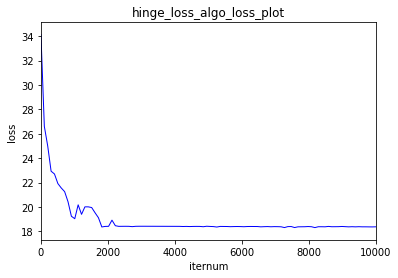

accuracy: 1.0000


In [8]:
(X_train, Y_train), (X_valid, Y_valid)=process_X()
model = SVM()
model.fit(X_train, Y_train,math_program="hinge_loss", algo="hinge_loss_algo", iternum=10000, lamda=30)
Y_pred = model.predict(X_valid)
print(f"accuracy: {accuracy(Y_valid, Y_pred):.4f}")

In [9]:
model.w,model.b

(array([[ 0.13610925],
        [-0.17928064],
        [ 0.57768   ],
        [ 0.23562675]]), array([-1.96362268]))

#### 试验2(对于对偶方程和非线性kernel函数):使用优化算法SQP直接求解alpha

- 对于margin_C还是比较的robust：实验了一下C=0.05以上似乎都OK

In [10]:
%%time
(X_train, Y_train), (X_valid, Y_valid)=process_X()
model1 = SVM()
model1.fit(X_train, Y_train,math_program="dual_model_nonliner_loss", algo="dual_optm_algo", margin_C=0.1)
Y_pred = model1.predict(X_valid,isnolinear=True)
print("------------------------------------")
print(f"accuracy: {accuracy(Y_valid, Y_pred):.4f}")
print("------------------------------------")

....正在使用优化算法SQP直接求解alpha...
------------------------------------
迭代终止是否成功： True
fmin： -2.59245614291428
向量alpha: [0.01698859 0.         0.01456012 0.1        0.07795744 0.1
 0.1        0.         0.         0.1        0.0879561  0.
 0.         0.         0.1        0.         0.         0.09648196
 0.         0.1        0.1        0.1        0.1        0.07479176
 0.1        0.         0.03361904 0.1        0.1        0.1
 0.         0.1        0.1        0.1        0.1        0.09797673
 0.         0.         0.1        0.1        0.1        0.01595671
 0.1        0.         0.1        0.         0.         0.
 0.1        0.1        0.1        0.         0.1        0.01599255
 0.1        0.1        0.         0.1        0.1        0.
 0.1        0.07329402 0.1        0.1        0.1        0.1
 0.1        0.0213345  0.1        0.03895072 0.1        0.
 0.         0.         0.1        0.00844464 0.1        0.
 0.         0.        ]
等式约束1误差： [-1.80411242e-16]
不等式约束1满足个数(alpha=0)： 26
不等

#### 试验3(对偶非线性kernel函数):使用SMO求解

In [11]:
%%time
(X_train, Y_train), (X_valid, Y_valid)=process_X()
model2 = SVM()
model2.fit(X_train, Y_train,math_program="dual_model_smo", algo="smo_algo",margin_C=0.3, toler=0.03, iternum=3)
Y_pred = model2.predict_smo(X_valid)
print("------------------------------------")
print(f"accuracy: {accuracy(Y_valid, Y_pred):.4f}")
print("------------------------------------")

迭代第0次：changed_alphas个数为 13
迭代第1次：changed_alphas个数为 0
退出迭代
------------------------------------
accuracy: 1.0000
------------------------------------
CPU times: user 644 ms, sys: 32.9 ms, total: 677 ms
Wall time: 630 ms


- 第一次尝试父类子类，没有把整个程序的代码设计的很好
- 用了很多重复但不同的函数，导致整个结构不是很好，影响代码阅读，很抱歉